<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


In [3]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('mtcars').data

Read your chosen dataset into pandas dataframe:


In [4]:
#data = pd.read_csv('')
#data.head()

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


It contains data about various car models, with a focus on different performance metrics of the cars. The dataset was originally extracted from the 1974 Motor Trend US magazine, which provides specifications and performance measurements for 32 different car models.
The dataset consists of various car attributes such as miles per gallon (mpg), engine displacement, number of cylinders, weight, and more.


mpg: Miles per gallon (fuel efficiency), a continuous variable representing the number of miles the car can travel per gallon of fuel.

cyl: Number of cylinders in the car's engine. This is a categorical variable, representing the type of engine.

disp: Displacement (in cubic inches) of the car's engine. A continuous variable that measures the engine's volume.

hp: Horsepower of the car's engine. A continuous variable indicating the engine's power.

drat: Rear axle ratio. This continuous variable represents the ratio of the car's rear axle gears.

wt: Weight of the car (in 1000 lbs). A continuous variable that shows the car's weight.

qsec: 1/4 mile time. This continuous variable shows the time it takes the car to complete a quarter-mile drag race.

vs: Engine shape (0 = V-shaped, 1 = straight). A categorical variable that indicates the engine's configuration.

am: Transmission type (0 = automatic, 1 = manual). This categorical variable represents whether the car has an automatic or manual transmission.

gear: Number of forward gears. A categorical variable indicating how many gears the car has.

carb: Number of carburetors. A categorical variable representing how many carburetors the car uses

# 2. Objectives


- Predict Fuel Efficiency (mpg): The primary goal is to predict the miles per gallon (mpg) of a car based on other car features. The target variable is mpg, and the other columns (such as cyl, disp, hp, wt, etc.) serve as features or predictors.
- Evaluate Model Performance: The dataset is ideal for training and testing different types of regression models (such as linear regression, multiple regression, etc.) to determine which model can best predict the mpg based on the other features.
- Feature Relationships: By applying regression, you can identify the relationships between the target variable (mpg) and different features (such as engine size (disp), weight (wt), and horsepower (hp)), which can help in understanding how these features influence fuel efficiency.
- Assessing Model Quality: You can use various metrics such as R-squared, Mean Squared Error (MSE), and Adjusted R-squared to assess the performance of your regression model and understand how well it generalizes to unseen data.

## Data Exploration

In [7]:
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

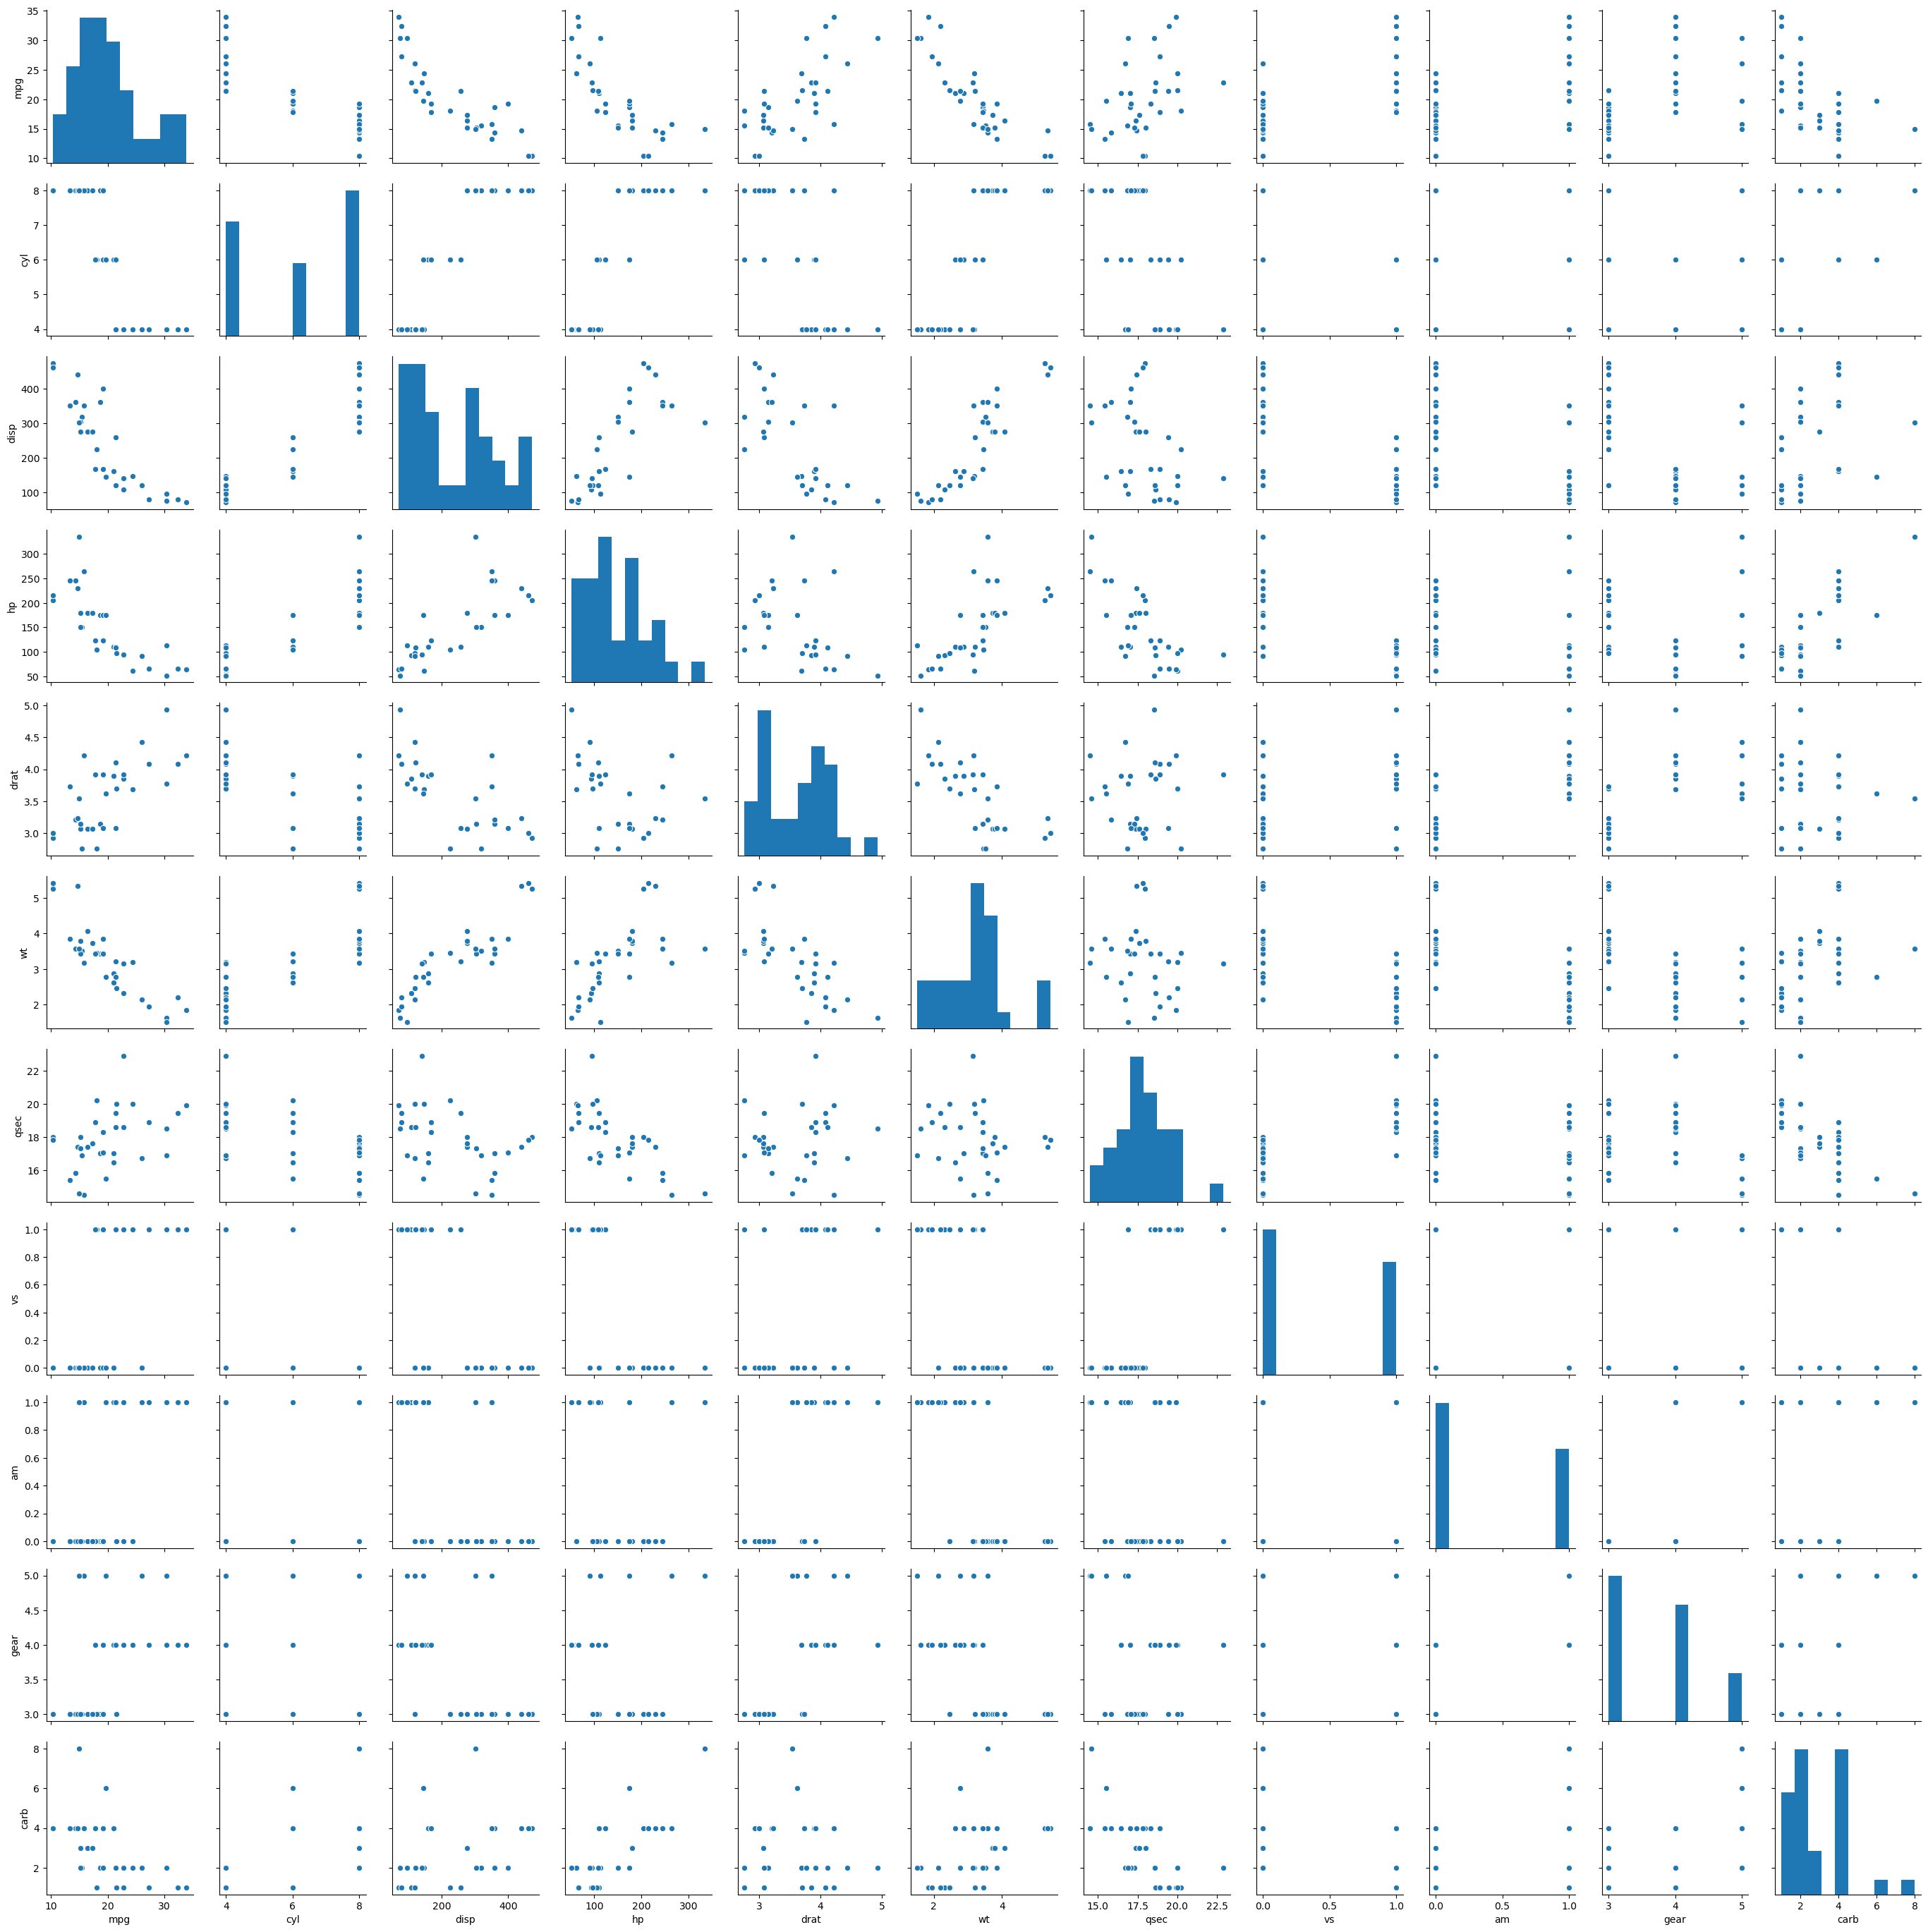

In [11]:
sns.pairplot(df)
plt.show()

# 3. Linear Regression Models


In [13]:
X = df.drop('mpg', axis=1)
y = df['mpg'] 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_pred = model.predict(X_test_scaled)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.130154667787261
R-squared: 0.7466453084791009


# 3.1 Linear Regression with Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
X = df.drop('mpg', axis=1)
y = df['mpg'] 

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
model = LinearRegression()

In [28]:
cv_results = cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
cv_results_positive = -cv_results

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.

In [29]:
print(f"Cross-Validation Mean Squared Error for each fold: {cv_results_positive}")
print(f"Mean MSE across all folds: {cv_results_positive.mean()}")
print(f"Standard Deviation of MSE across folds: {cv_results_positive.std()}")

Cross-Validation Mean Squared Error for each fold: [10.13015467  8.75653636  4.88617182  9.37630918 21.71654494]
Mean MSE across all folds: 10.973143393641841
Standard Deviation of MSE across folds: 5.6682582149798195


# 3.2 Ridge

In [34]:
from sklearn.linear_model import Ridge

X = df.drop('mpg', axis=1)
y = df['mpg']

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
ridge_model = Ridge(alpha=1.0)

In [37]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
cv_results = cross_val_score(ridge_model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
cv_results_positive = -cv_results

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.

In [39]:
print(f"Cross-Validation Mean Squared Error for each fold: {cv_results_positive}")
print(f"Mean MSE across all folds: {cv_results_positive.mean()}")
print(f"Standard Deviation of MSE across folds: {cv_results_positive.std()}")

Cross-Validation Mean Squared Error for each fold: [ 6.6088089   6.55100473  4.98885715  9.22674421 14.9827219 ]
Mean MSE across all folds: 8.471627379538173
Standard Deviation of MSE across folds: 3.528544337129107


# Lasso

In [41]:
from sklearn.linear_model import Lasso

X = df.drop('mpg', axis=1)
y = df['mpg']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
lasso_model = Lasso(alpha=0.1)

In [44]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [45]:
cv_results = cross_val_score(lasso_model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
cv_results_positive = -cv_results

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.

In [46]:
print(f"Cross-Validation Mean Squared Error for each fold: {cv_results_positive}")
print(f"Mean MSE across all folds: {cv_results_positive.mean()}")
print(f"Standard Deviation of MSE across folds: {cv_results_positive.std()}")

Cross-Validation Mean Squared Error for each fold: [ 6.64908656  6.88823401  4.78693276  8.18632578 13.4569221 ]
Mean MSE across all folds: 7.993500241268488
Standard Deviation of MSE across folds: 2.9392957212904083


# Ridge & Lasso

In [56]:
from sklearn.linear_model import ElasticNet

X = df.drop('mpg', axis=1)
y = df['mpg']

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [59]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [60]:
elastic_net_cv_results = cross_val_score(elastic_net_model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
elastic_net_cv_results_positive = -elastic_net_cv_results

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.

In [61]:
print("ElasticNet Regression Cross-Validation Results:")
print(f"Cross-Validation MSE for each fold: {elastic_net_cv_results_positive}")
print(f"Mean MSE for ElasticNet: {elastic_net_cv_results_positive.mean()}")
print(f"Standard Deviation of MSE for ElasticNet: {elastic_net_cv_results_positive.std()}\n")

ElasticNet Regression Cross-Validation Results:
Cross-Validation MSE for each fold: [ 6.46079819  6.10608195  4.77100455  8.6341274  12.7645761 ]
Mean MSE for ElasticNet: 7.747317639142741
Standard Deviation of MSE for ElasticNet: 2.7988047607935878



# 4. Insights and key findings


In [65]:
data = {
    'Model': ['Linear', 'Linear CV', 'Ridge CV', 'Lasso CV', 'Elastic net CV'],
    'MSE': ['10.13', '10.97', '8.47', '7.99', '7.75']
}

df = pd.DataFrame(data)
print(df)

            Model    MSE
0          Linear  10.13
1       Linear CV  10.97
2        Ridge CV   8.47
3        Lasso CV   7.99
4  Elastic net CV   7.75


Model Comparison:

- The Linear model (10.13) has a lower MSE than Linear CV (10.97). The difference suggests that cross-validation (CV) with the linear model may not have added value in this case and might even slightly degrade performance.
- The Ridge CV model (8.47) performs better than both the Linear and Linear CV models, indicating that regularization (Ridge) may help - -reduce the error, likely by controlling overfitting.
- Lasso CV (7.99) and Elastic net CV (7.75) perform the best, with Elastic net CV being the best performer. This suggests that a combination of Lasso and Ridge regularization (Elastic Net) yields the lowest Mean Squared Error (MSE).

Regularization Impact:

- It is clear that models with regularization techniques (Ridge, Lasso, and Elastic Net) tend to outperform the simple Linear model. Regularization helps reduce model complexity and overfitting, leading to better generalization on unseen data.
- The Elastic Net model appears to provide the best of both Lasso and Ridge regularization, which is reflected in the lowest MSE.

Cross-validation:

- Cross-validation (CV) has been applied to all models except the simple Linear model. This indicates that cross-validation is beneficial for better generalization, which is reflected in the improved MSE scores of the models with CV applied.
- The increase in MSE from Linear to Linear CV could be due to the extra variance introduced during cross-validation, although this doesn't always hold true. For this case, Lasso CV and Elastic Net CV were the most effective.

Overall Model Performance:

- Elastic Net CV provides the best performance with the lowest MSE, indicating its potential for high predictive accuracy when combined with cross-validation.
- Linear models with regularization (Ridge and Lasso CV) seem to offer better performance than the simple linear regression model, likely due to their ability to control for overfitting and improve generalization.

Conclusion:

- Elastic Net CV is the best-performing model with the lowest MSE, suggesting it's a good choice for your predictive task.
- Ridge CV and Lasso CV also offer improvements over the Linear model, showcasing the advantages of using regularization.
- Linear CV may not have provided a significant improvement in performance over the simple Linear model, indicating that regularization models are more effective in this case.

For future work, you might want to further fine-tune the Elastic Net model's parameters (like alpha and l1_ratio) to see if you can achieve even better performance.

# 5. Next Steps


Given that you've identified the best-performing model (Elastic Net CV) and observed the benefits of regularization, here are the logical next steps to further improve your analysis and model:

1. Hyperparameter Tuning for Elastic Net CV:
- Since Elastic Net CV is your best model so far, the next step would be to fine-tune its hyperparameters to maximize its performance further.
- The two key hyperparameters for Elastic Net are:
    Alpha (the overall regularization strength).
    L1 ratio (the mix between Lasso (L1) and Ridge (L2) regularization).

Use Grid Search CV or Randomized Search CV to find the optimal combination of these hyperparameters.

2. Cross-validation on Other Models:
- Although Elastic Net CV performed the best in this case, it's worth experimenting with different models, especially if you're dealing with large and complex datasets. For example, you might want to test:
- Support Vector Machines (SVM) with regularization.
- Random Forests or Gradient Boosting Machines.
- XGBoost or LightGBM, which are often effective for regression tasks.

Perform cross-validation on these models and compare their performance (MSE) against the Elastic Net CV.

3. Check for Feature Importance:
- Once you have tuned the models, check for the feature importance. In Elastic Net, the Lasso part (L1 regularization) tends to zero out some coefficients, indicating which features have a more significant impact on the prediction.
- This can help you understand which features are contributing most to your model's predictions, guiding future feature engineering.

4. Model Evaluation and Diagnostics:
- Evaluate on Test Set: After tuning and cross-validating the model, always evaluate its performance on a held-out test set to see how it generalizes to unseen data.
- Residual Analysis: Investigate residuals (the difference between the predicted and actual values). This helps check for any patterns in the model's errors that could suggest areas of improvement.
- Learning Curves: Plot learning curves for both training and validation datasets to ensure that the model is not overfitting or underfitting.

5. Feature Engineering:
- Feature Transformation: Explore if log or polynomial transformations of your features improve model performance.
- Interaction Features: Consider adding interaction terms (multiplying features together) to capture more complex relationships in the data.
- Feature Selection: Use methods like Recursive Feature Elimination (RFE) or L1 Regularization (Lasso) to select the most important features and reduce dimensionality.

6. Model Deployment:
- Once you are satisfied with your model's performance, the next step is to deploy it for making real-time predictions.
- You can save the trained model using joblib or pickle and deploy it using frameworks such as Flask or FastAPI for building web APIs.

7. Monitor Model Performance:
- Continuous Monitoring: After deployment, keep an eye on your model’s performance, as it might degrade over time due to data drift.
- Re-training: Periodically retrain the model with new data to maintain high performance.

Summary:
- Hyperparameter Tuning: Optimize Elastic Net using Grid Search.
- Cross-Validation: Test additional models and compare their performance.
- Feature Importance: Identify and focus on the most important features.
- Evaluation and Diagnostics: Use residuals and learning curves to diagnose performance issues.
- Feature Engineering: Experiment with new features and transformations.
- Deployment: Prepare the model for deployment and monitoring.

By following these steps, you can further enhance the model's accuracy and robustness, and ultimately deploy it in a production setting.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
